NAME = SHYAM KUMAR RAJPOOT

COURSE = MCA

DOMAIN = DATA SCIENCE

TASK = SALES PREDICTION USING PYTHON

Batch - MAY Phase 2 AICTE OIB-SIP 2024 **bold text**

In [595]:
# import usefull libraries for manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for training,selecting,and Evaluating
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix
#from sklearn.preprocessing import LabelEncoder

**Load dataset**

In [596]:
df = pd.read_csv('/content/sample_data/Advertising.csv')

In [597]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [598]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [599]:
# Drop unnecessary col.
df = df.drop(columns=['Unnamed: 0'])

In [600]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


**Analysing data**

In [601]:
df.shape

(200, 4)

In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [603]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [604]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [605]:
X = df.iloc[:,0:-1]

In [606]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [607]:
y=df.iloc[:,-1]

In [608]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [609]:
X.iloc[:,0]

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [610]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [611]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


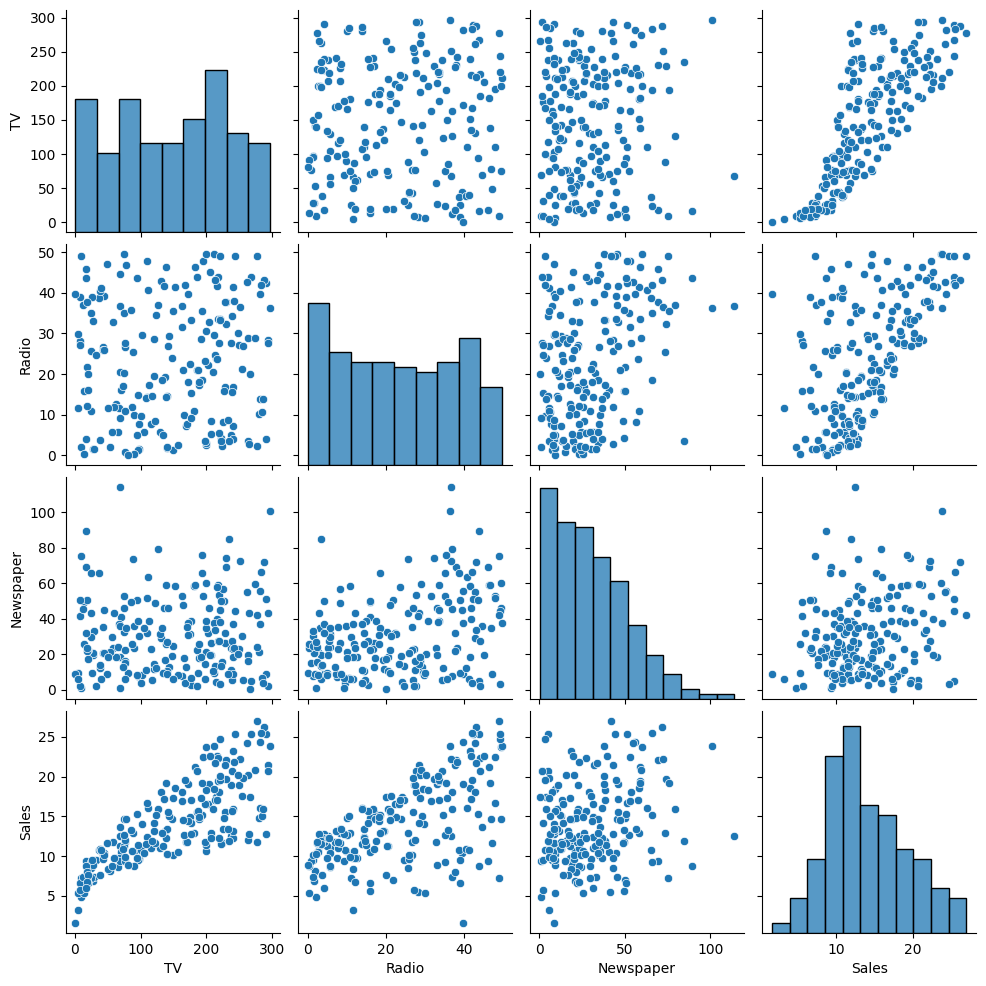

In [612]:
sns.pairplot(data=df)
plt.show()

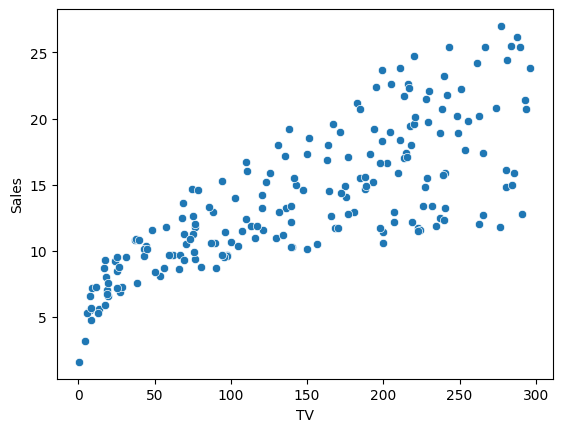

In [613]:
# Exploratory Data Analysis
sns.scatterplot(x="TV" , y="Sales",data=df)
plt.show()

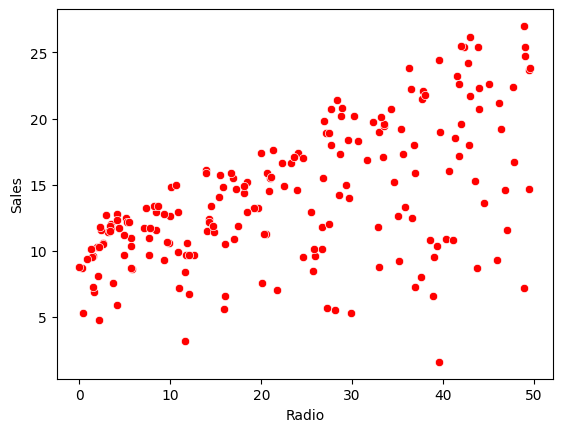

In [614]:
sns.scatterplot(x="Radio", y="Sales", color="red", data=df)
plt.show()

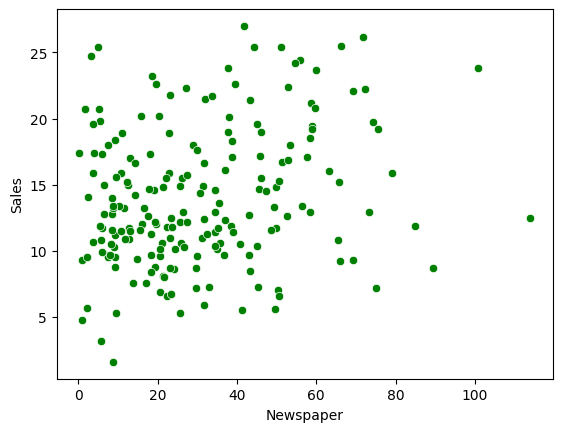

In [615]:
sns.scatterplot(x="Newspaper", y="Sales", color="green", data=df)
plt.show()

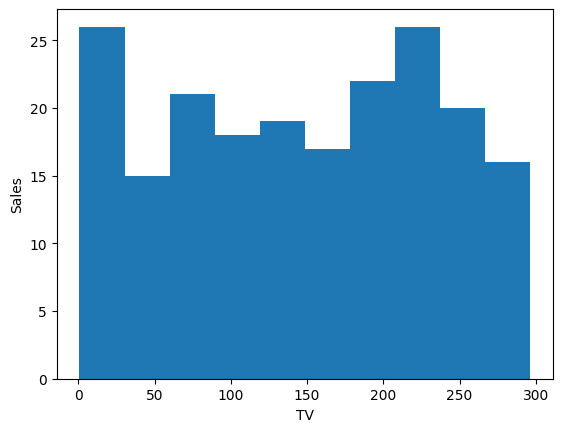

In [616]:
plt.hist(df["TV"],bins=10)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

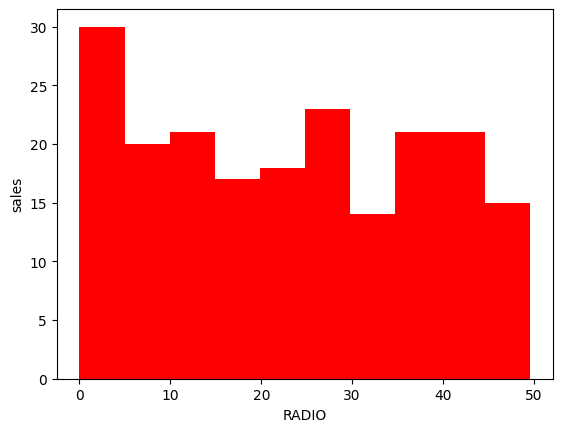

In [617]:
plt.hist(df["Radio"],color="red",bins=10)
plt.xlabel("RADIO")
plt.ylabel("sales")
plt.show()

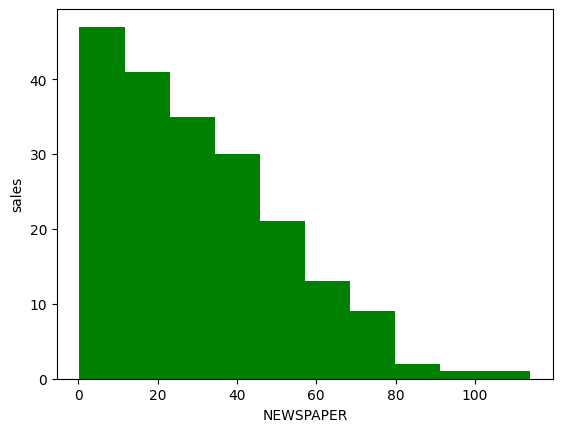

In [618]:
plt.hist(df["Newspaper"],color="green",bins=10)
plt.xlabel("NEWSPAPER")
plt.ylabel("sales")
plt.show()

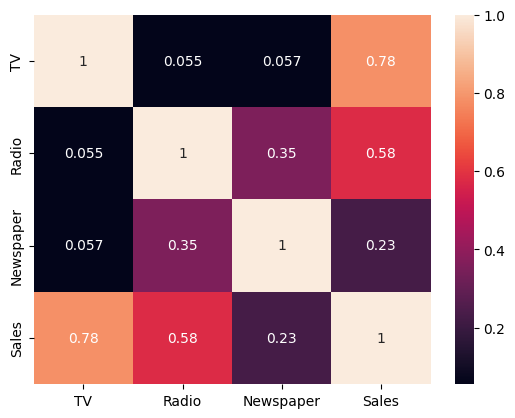

In [619]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [620]:
# Dividing dataset in Independant & Dependant variable
X=df[["TV"]]
y =df[["Sales"]]

In [621]:
X.shape,y.shape

((200, 1), (200, 1))

In [622]:
# split data in Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [623]:
X_train

,TV
116,139.2
138,43.0
155,4.1
82,75.3
160,172.5
...,...
58,210.8
21,237.4
49,66.9
64,131.1


In [624]:
X_test

,TV
56,7.3
37,74.7
67,139.3
79,116.0
80,76.4
188,286.0
183,287.6
10,66.1
128,220.3
62,239.3


In [625]:
y_train

,Sales
116,12.2
138,9.6
155,3.2
82,11.3
160,14.4
...,...
58,23.8
21,12.5
49,9.7
64,18.0


In [626]:
y_test

,Sales
56,5.5
37,14.7
67,13.4
79,11.0
80,11.8
188,15.9
183,26.2
10,8.6
128,24.7
62,15.7


In [627]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [628]:
sc = StandardScaler()

In [629]:

X_train_scaled = sc.fit_transform(X_train) # Changed method name to 'fit_transform'
X_test_scaled = sc.fit_transform(X_test)

In [630]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [631]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [632]:
y_pred = lr.predict(X_test_scaled)

In [633]:
X_test = lr.predict(y_pred)

In [634]:
y_pred

array([[ 6.97306267],
       [10.08205303],
       [13.0982377 ],
       [12.03097235],
       [10.17485871],
       [19.91945534],
       [19.96585818],
       [ 9.7108303 ],
       [16.85686783],
       [17.73852181],
       [ 9.85003882],
       [19.68744113],
       [16.81046499],
       [ 8.41155075],
       [17.78492465],
       [ 8.64356495],
       [14.44392009],
       [ 8.68996779],
       [18.24895306],
       [ 9.89644166],
       [17.32089624],
       [ 7.43709108],
       [17.04247919],
       [13.887086  ],
       [14.21190588],
       [ 7.48349392],
       [16.16082521],
       [17.22809055],
       [ 8.08673086],
       [13.46946043],
       [16.57845078],
       [14.76873998],
       [14.86154566],
       [16.7176593 ],
       [16.62485362],
       [ 8.68996779],
       [12.95902917],
       [ 7.48349392],
       [12.26298656],
       [16.20722805]])

In [635]:
y_test

,Sales
56,5
37,14
67,13
79,11
80,11
188,15
183,26
10,8
128,24
62,15


In [636]:
lr.score(X_test_scaled, y_test)

0.6667301718094236

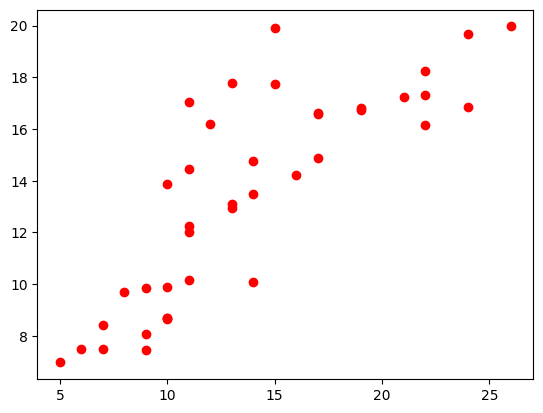

In [637]:
plt.scatter(y_test,y_pred, c = 'r' )

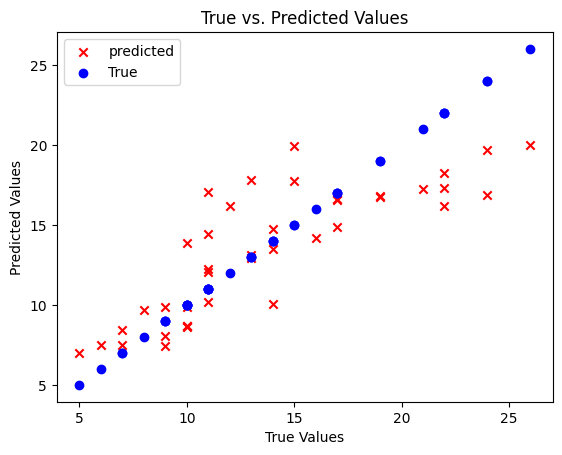

In [638]:
plt.scatter(y_test,y_pred,c='r',label='predicted',marker='x')
plt.scatter(y_test,y_test,c='b',label='True',marker='o')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.legend()
plt.show()

In [639]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

9.607335972163838

In [640]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

2.4423511045602786

In [641]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.6667301718094236

**the lower value of MAE,MSE and RMSE implies Higher accuracy of regression model**

In [642]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 9.607335972163838


In [643]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           1.47e-42
Time:                        10:09:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0